In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
a=pd.read_csv("E:/VB/diabetes.csv")
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
a.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
a.drop(['Pregnancies','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'],axis=1,inplace=True)
a.tail()

,Glucose,SkinThickness
763,101,48
764,122,27
765,121,23
766,126,0
767,93,31


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Glucose        768 non-null    int64
 1   SkinThickness  768 non-null    int64
dtypes: int64(2)
memory usage: 12.1 KB


In [6]:
a.shape

(768, 2)

<H1>Glucose - Continuous Data</H1>

In [31]:
a.Glucose.isnull().sum()

0

In [7]:
stats.shapiro(a.Glucose)

ShapiroResult(statistic=0.9701042175292969, pvalue=1.9867612763291298e-11)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cecc55a580>,
 'caps': [<matplotlib.lines.Line2D at 0x1cecc55abe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cecc55a250>],
 'medians': [<matplotlib.lines.Line2D at 0x1ced12db340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ced12db6d0>],
 'means': []}

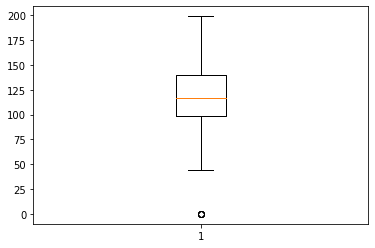

In [8]:
plt.boxplot(a.Glucose)

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

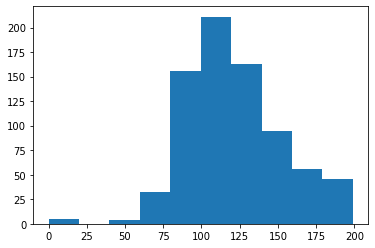

In [9]:
plt.hist(a.Glucose)

<H1>SkinThickness - Continuous Data</H1>


In [33]:
a.SkinThickness.isnull().sum()

0

In [10]:
stats.shapiro(a.SkinThickness)

ShapiroResult(statistic=0.90462726354599, pvalue=1.75157635361056e-21)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ced145db20>,
 'caps': [<matplotlib.lines.Line2D at 0x1ced146c280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ced145d790>],
 'medians': [<matplotlib.lines.Line2D at 0x1ced146c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ced146cd30>],
 'means': []}

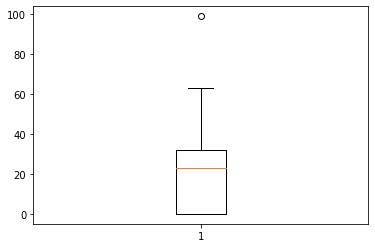

In [11]:
plt.boxplot(a.SkinThickness)

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

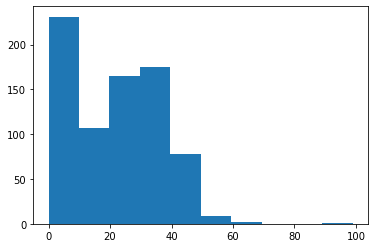

In [12]:
plt.hist(a.SkinThickness)

<H1>STRENGTH TEST</H1>

In [35]:
strength=stats.pearsonr(a.SkinThickness,a.Glucose)
print(strength)

(0.05732789073817703, 0.11241414950019196)


In [13]:
train=a.iloc[0:614]
print(train)

     Glucose  SkinThickness
0        148             35
1         85             29
2        183              0
3         89             23
4        137             35
..       ...            ...
609      111             13
610      106             21
611      174             22
612      168             42
613      105             28

[614 rows x 2 columns]


In [14]:
test=a.iloc[614:]
print(test)

     Glucose  SkinThickness
614      138             26
615      106              0
616      117              0
617       68             13
618      112             24
..       ...            ...
763      101             48
764      122             27
765      121             23
766      126              0
767       93             31

[154 rows x 2 columns]


In [15]:
train.shape

(614, 2)

In [16]:
test.shape

(154, 2)

In [17]:
train_x=train.SkinThickness
print(train_x)

0      35
1      29
2       0
3      23
4      35
       ..
609    13
610    21
611    22
612    42
613    28
Name: SkinThickness, Length: 614, dtype: int64


In [18]:
train_y=train.Glucose
print(train_y)

0      148
1       85
2      183
3       89
4      137
      ... 
609    111
610    106
611    174
612    168
613    105
Name: Glucose, Length: 614, dtype: int64


In [19]:
train_x=sm.add_constant(train_x)

C:\Users\SANJAY\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
model=sm.OLS(train_y,train_x).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.270
Date:                Sun, 03 Apr 2022   Prob (F-statistic):              0.132
Time:                        15:01:08   Log-Likelihood:                -3010.9
No. Observations:                 614   AIC:                             6026.
Df Residuals:                     612   BIC:                             6035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           117.8743      2.158     54.630      0.000     113.637     122.112
SkinThickness     0.1246      0.083      1.507      0.132      -0.038       0.287
==============================================================================
Omnibus:                        9.804   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               14.778
Skew:                           0.098   Prob(JB):                     0.000618
Kurtosis:                       3.735   Cond. No.                         42.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.params

const            117.874315
SkinThickness      0.124590
dtype: float64

In [23]:
test_x=test.SkinThickness
print(test_x)

614    26
615     0
616     0
617    13
618    24
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 154, dtype: int64


In [24]:
test_y=test.Glucose
print(test_y)

614    138
615    106
616    117
617     68
618    112
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 154, dtype: int64


In [25]:
test_x=sm.add_constant(test_x)

C:\Users\SANJAY\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
predicted_values=model.predict(test_x)

<AxesSubplot:xlabel='SkinThickness', ylabel='_y'>

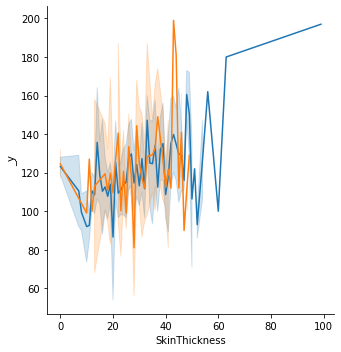

In [37]:
sns.relplot(x=train.SkinThickness,y=predicted_values,kind='scatter')
sns.lineplot(x=train.SkinThickness,y=train.Glucose)
sns.lineplot(x=test.SkinThickness,y=test.Glucose)